<a href="https://colab.research.google.com/github/Alexander2212/PrimerParcialSis420/blob/main/01_reg_log_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer Parcial SIS420

Nombre: Alexander NahuelBarañado Mendez


Voy a conectar mi google driva para tener acceso aldataset

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importare las librerias que voy a necesitar

In [80]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd
import string
# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

#1


cargo los datos que tiene el archivo y los guardo en data para su uso

In [81]:
# Cargar datos
data = pd.read_csv('/content/drive/MyDrive/IA/Parciales/weatherAUS.csv')

# Guardar los datos en una variable auxiliar para no alterarlos
data_aux = data.copy()
# Variables de Entrada del dataset
X = data.iloc[:, :22]


# Variables de Salida del dataset
y = data['MinTemp']

# Muestra el tamaño de "y"
m = y.size
print(X)
print(y)
print(m)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  \
0            NaN           W           44.0          W  ...

creo las columnas duracion, categoria. hubo nieve, huboafectados y los lleno con datos random entre las opciones que le proporciono

In [82]:
#crear las columnas
column1 = np.random.randint(0, 251, len(X)) # Valores entre 0 y 250 con 2 decimales
options = ['sí', 'no']
column2 = np.random.choice(options, len(X))  # Palabras aleatorias: sí o no
# Lista de opciones: 'F' o 'M'
letters = ['P', 'M', 'G' ]
column3 = np.random.choice(letters, len(X))  # Letras aleatorias: F o M
boolean_options = [True, False]
column4 = np.random.choice(boolean_options, len(X))  # Valores booleanos



# Agregar las columnas aleatorias al final de X
X['Duracion en minutos'] = column1
X['Categoria'] = column3
X['hubo nieve'] = column2
X['hubo afectados'] = column4
print(X)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  \
0            NaN           W           44.0          W  ... 

#2

In [83]:
X = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=145460, freq='H'),
    'Location': np.random.choice(['City1', 'City2', 'City3'], 145460),
    'MinTemp': np.random.uniform(-10, 25, 145460),
    'MaxTemp': np.random.uniform(10, 35, 145460),
    'Rainfall': np.random.uniform(0, 50, 145460),
    'Evaporation': np.random.uniform(0, 20, 145460),
    'Sunshine': np.random.uniform(0, 15, 145460),
    'WindGustDir': np.random.choice(['N', 'E', 'S', 'W'], 145460),
    'WindGustSpeed': np.random.uniform(0, 50, 145460),
    'WindDir9am': np.random.choice(['N', 'E', 'S', 'W'], 145460),
    'WindDir3pm': np.random.choice(['N', 'E', 'S', 'W'], 145460),
    'WindSpeed9am': np.random.uniform(0, 20, 145460),
    'WindSpeed3pm': np.random.uniform(0, 20, 145460),
    'Humidity9am': np.random.uniform(0, 100, 145460),
    'Humidity3pm': np.random.uniform(0, 100, 145460),
    'Pressure9am': np.random.uniform(990, 1020, 145460),
    'Pressure3pm': np.random.uniform(990, 1020, 145460),
    'Cloud9am': np.random.uniform(0, 8, 145460),
    'Cloud3pm': np.random.uniform(0, 8, 145460),
    'Temp9am': np.random.uniform(-5, 30, 145460),
    'Temp3pm': np.random.uniform(-5, 35, 145460),
    'RainToday': np.random.choice(['Yes', 'No'], 145460),
    'RainTomorrow': np.random.choice(['Yes', 'No'], 145460)
})

def duplicate_with_variation(df, noise_factor=0.01):
    # Crear una copia del DataFrame original
    df_copy = df.copy()

    # Introducir pequeñas variaciones en las columnas numéricas
    for column in df.columns:
        if df[column].dtype in [np.float64, np.int64]:  # Para columnas numéricas
            df_copy[column] += np.random.normal(loc=0, scale=noise_factor, size=len(df))
        # No se modifica las columnas categóricas
        elif df[column].dtype == object:
            pass

    # Concatenar los datos originales con los modificados
    df_duplicated = pd.concat([df, df_copy], ignore_index=True)

    return df_duplicated

# Aplicar la función para duplicar el DataFrame con variaciones
X_duplicated = duplicate_with_variation(X)


# Imprimir el DataFrame con los ejemplos duplicados
print(X_duplicated)


                      Date Location    MinTemp    MaxTemp   Rainfall  \
0      2020-01-01 00:00:00    City2   3.080157  21.483727  33.275092   
1      2020-01-01 01:00:00    City3   2.423590  12.180105  18.718655   
2      2020-01-01 02:00:00    City1   8.827571  27.708759   0.369547   
3      2020-01-01 03:00:00    City2  15.990697  16.080506  35.759230   
4      2020-01-01 04:00:00    City3  18.763496  26.119254  21.823962   
...                    ...      ...        ...        ...        ...   
290915 2036-08-04 15:00:00    City3  17.694714  12.596490  17.978255   
290916 2036-08-04 16:00:00    City2  18.042539  26.084195   4.749101   
290917 2036-08-04 17:00:00    City2   5.962047  21.534724  28.011461   
290918 2036-08-04 18:00:00    City3  16.546196  25.748365   2.519820   
290919 2036-08-04 19:00:00    City3  24.371329  17.287292   3.535086   

        Evaporation   Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  \
0          6.311886  12.835651           W       4.092293 

In [84]:
# Duplicar el numero de ejemplos
X_duplicated = pd.concat([X, X], ignore_index=True)

# Imprimir el DataFrame con los ejemplos duplicados
print(X_duplicated)

                      Date Location    MinTemp    MaxTemp   Rainfall  \
0      2020-01-01 00:00:00    City2   3.080157  21.483727  33.275092   
1      2020-01-01 01:00:00    City3   2.423590  12.180105  18.718655   
2      2020-01-01 02:00:00    City1   8.827571  27.708759   0.369547   
3      2020-01-01 03:00:00    City2  15.990697  16.080506  35.759230   
4      2020-01-01 04:00:00    City3  18.763496  26.119254  21.823962   
...                    ...      ...        ...        ...        ...   
290915 2036-08-04 15:00:00    City3  17.698235  12.590644  17.974106   
290916 2036-08-04 16:00:00    City2  18.019444  26.073416   4.726412   
290917 2036-08-04 17:00:00    City2   5.972716  21.518179  28.012551   
290918 2036-08-04 18:00:00    City3  16.553716  25.745639   2.511834   
290919 2036-08-04 19:00:00    City3  24.369076  17.286964   3.529773   

        Evaporation   Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  \
0          6.311886  12.835651           W       4.092293 

In [85]:
# Duplicar las columnas
X_duplicated_columns = X.copy()  # Crear una copia del DataFrame para duplicar columnas
for column in X.columns:
    X_duplicated_columns[f'{column}_dup'] = X[column]  # Agregar cada columna duplicada

# Imprimir el DataFrame con las columnas duplicadas
print(X_duplicated_columns)

                      Date Location    MinTemp    MaxTemp   Rainfall  \
0      2020-01-01 00:00:00    City2   3.080157  21.483727  33.275092   
1      2020-01-01 01:00:00    City3   2.423590  12.180105  18.718655   
2      2020-01-01 02:00:00    City1   8.827571  27.708759   0.369547   
3      2020-01-01 03:00:00    City2  15.990697  16.080506  35.759230   
4      2020-01-01 04:00:00    City3  18.763496  26.119254  21.823962   
...                    ...      ...        ...        ...        ...   
145455 2036-08-04 15:00:00    City3  17.698235  12.590644  17.974106   
145456 2036-08-04 16:00:00    City2  18.019444  26.073416   4.726412   
145457 2036-08-04 17:00:00    City2   5.972716  21.518179  28.012551   
145458 2036-08-04 18:00:00    City3  16.553716  25.745639   2.511834   
145459 2036-08-04 19:00:00    City3  24.369076  17.286964   3.529773   

        Evaporation   Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  \
0          6.311886  12.835651           W       4.092293 

In [86]:
# Duplicar las filas
X_duplicated_filas = pd.concat([X, X], ignore_index=True)

# Duplicar las columnas
X_duplicated_both = X_duplicated_filas.copy()  # Crear una copia del DataFrame para duplicar columnas
for column in X_duplicated_filas.columns:
    X_duplicated_both[f'{column}_dup'] = X_duplicated_filas[column]  # Agregar cada columna duplicada

# Imprimir el DataFrame con filas y columnas duplicadas
print(X_duplicated_both)

                      Date Location    MinTemp    MaxTemp   Rainfall  \
0      2020-01-01 00:00:00    City2   3.080157  21.483727  33.275092   
1      2020-01-01 01:00:00    City3   2.423590  12.180105  18.718655   
2      2020-01-01 02:00:00    City1   8.827571  27.708759   0.369547   
3      2020-01-01 03:00:00    City2  15.990697  16.080506  35.759230   
4      2020-01-01 04:00:00    City3  18.763496  26.119254  21.823962   
...                    ...      ...        ...        ...        ...   
290915 2036-08-04 15:00:00    City3  17.698235  12.590644  17.974106   
290916 2036-08-04 16:00:00    City2  18.019444  26.073416   4.726412   
290917 2036-08-04 17:00:00    City2   5.972716  21.518179  28.012551   
290918 2036-08-04 18:00:00    City3  16.553716  25.745639   2.511834   
290919 2036-08-04 19:00:00    City3  24.369076  17.286964   3.529773   

        Evaporation   Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  \
0          6.311886  12.835651           W       4.092293 

3

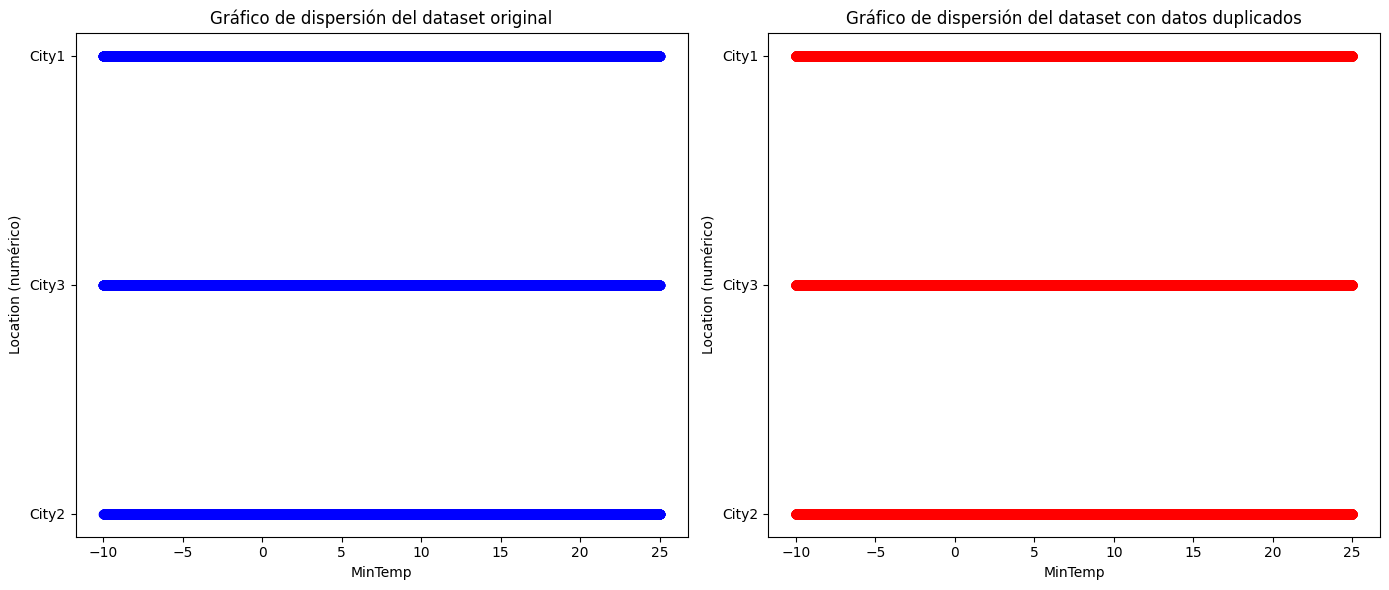

In [87]:
# Crear gráficos
import matplotlib.pyplot as plt
# Configurar el tamaño de la figura
plt.figure(figsize=(14, 6))

# Primer gráfico: Solo datos originales
plt.subplot(1, 2, 1)
plt.scatter(X['MinTemp'], X['Location'], alpha=0.5, color='blue')
plt.title('Gráfico de dispersión del dataset original')
plt.ylabel('Location (numérico)')
plt.xlabel('MinTemp')

# Segundo gráfico: Datos originales + datos duplicados
plt.subplot(1, 2, 2)
plt.scatter(X_duplicated_both['MinTemp'], X_duplicated_both['Location'], alpha=0.5, color='red')
plt.title('Gráfico de dispersión del dataset con datos duplicados')
plt.ylabel('Location (numérico)')
plt.xlabel('MinTemp')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

#4

In [99]:
# Separacion del Dataset 30% y 70%
from sklearn.model_selection import train_test_split

# Dividiendo los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Dividimos los datos para X_test y y_test donde serán los datos para la prueba
X_test = test_data[['MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                    'Humidity3pm', 'Pressure9am', 'Temp9am']]
y_test = test_data['Pressure3pm']

# Dividimos los datos para X_train y y_train para el entrenamiento
X_train = train_data[['MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                    'Humidity3pm', 'Pressure9am', 'Temp9am']]
y_train = train_data['Pressure3pm']

# Mostramos los datos que serán para el entrenamiento
print("Datos de X_train:")
print(X_train)
print("Datos de y_train:")
print(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 70)
print("El 70% de ejemplos que serán para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 30% de ejemplos que serán para el test son: {:.0f}".format(len(test_data)))


Datos de X_train:
        MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
141565     34.2           48.0          19.0          19.0         66.0   
85325      31.4           20.0           7.0           7.0         50.0   
17847      20.9            NaN          28.0           NaN         39.0   
69746       NaN           28.0          11.0          19.0          NaN   
98356      21.3           35.0          13.0          17.0         75.0   
...         ...            ...           ...           ...          ...   
110268     17.2            NaN           2.0          15.0         58.0   
119879     21.1           35.0          15.0           9.0         69.0   
103694     21.7           39.0           6.0          17.0         85.0   
131932     14.8           56.0          19.0          28.0         56.0   
121958     40.6           31.0           9.0          13.0         28.0   

        Humidity3pm  Pressure9am  Temp9am  
141565         27.0       1013.3     

#5

In [100]:
def graficarDatosDelluvia(X_train, y_train):
    # Crear una nueva figura
    fig = plt.figure()

    # Encontrar los índices de los ejemplos llovio no llovio
    lluvia = y == 0
    seco = y == 1

    # Graficar los ejemplos usando .loc para indexar correctamente
    pyplot.plot(X.loc[lluvia, 'Pressure9am'], X.loc[lluvia, 'Temp9am'], 'k*', lw=2, ms=10, label='llovio')
    pyplot.plot(X.loc[seco, 'Pressure9am'], X.loc[seco, 'Temp9am'], 'ko', mfc='y', ms=8, mec='k', mew=1, label='no llovio')
    pyplot.xlabel('Presion Atmosferica')
    pyplot.ylabel('Temperatura')
    pyplot.legend(loc='best')
    pyplot.show()

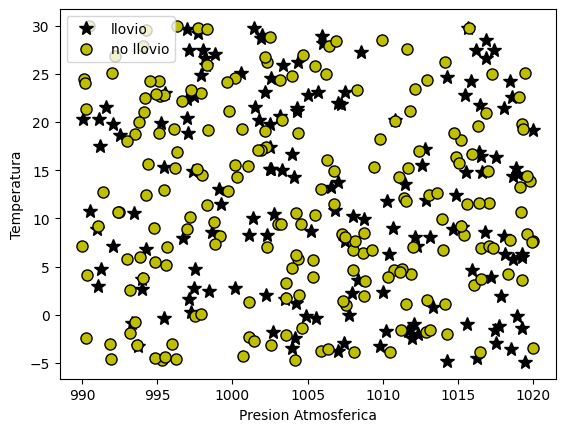

In [101]:
graficarDatosDelluvia(X_train, y_train)

<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea


Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [102]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [103]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)
print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [97]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_train.shape
print(f'Numero de Columnas: {n}')
print(f'Numero de Filas: {m}')
# Agraga el termino de intercepción a A
X_ready = np.concatenate([np.ones((m, 1)), X_train], axis=1)

Numero de Columnas: 8
Numero de Filas: 101822


Realizamos la funcion de costo en una regresión logistica

In [94]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

Realizamos una funcion para el descenso por pa gradiente

In [95]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0000001
num_iters = 60000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(1+n)
theta, J_history = descensoGradiente(theta, X_ready, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 1372, 2, 2, 10, 3.8074667544799388, 1545, 11, 1.8042727086281731]
lluvia = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f'Probabilidad de lluvia: {lluvia:.3f}')

In [ ]:
X_array = [1, 1372, 2, 2, 10, 3.8074667544799388, 1545, 11, 1.8042727086281731]
y_predicted = sigmoid(np.dot(X_array, theta))
print('Probabilidad de lluvia:{:.0f}'.format(y_predicted))

In [ ]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [ ]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X_ready, y_train)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')

In [ ]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-24, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X_ready, y_train)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

<a id="section4"></a>
#### 1.2.4 Evaluación de la regresión logistica

Después de aprender los parámetros, se puede usar el modelo para predecir si un estudiante en particular será admitido. Para un estudiante con una puntuación en el Examen 1 de 45 y una puntuación en el Examen 2 de 85, debe esperar ver una probabilidad de admisión de 0,776. Otra forma de evaluar la calidad de los parámetros que hemos encontrado es ver qué tan bien predice el modelo aprendido en nuestro conjunto de entrenamiento.

In [ ]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

veo la probabilidad

In [ ]:
# Compute accuracy on our training set
p = predict(theta, X_ready)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_train) * 100))